In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('Algerian_cleaned.csv')

In [36]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [37]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [38]:
df = df.drop(['day','month', 'year'],axis=1)

In [39]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [40]:
df['Classes'].value_counts()

Classes
fire             130
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [41]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [42]:
#independent and dependent features
X = df.drop(['FWI'],axis=1)
y = df['FWI']

In [43]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [44]:
##Fearure selection based on Co-relation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.633541,-0.326753,-0.326158,0.670991,0.500539,0.414435,0.582288,0.481162,0.534204,0.228602
RH,-0.633541,1.000000,0.244618,0.246809,-0.693967,-0.408694,-0.242503,-0.701701,-0.355504,-0.495133,-0.378845
Ws,-0.326753,0.244618,1.000000,0.276774,-0.238579,-0.022850,0.062691,-0.029080,0.007223,-0.123133,-0.155481
Rain,-0.326158,0.246809,0.276774,1.000000,-0.511201,-0.282580,-0.295887,-0.341425,-0.291974,-0.368007,-0.043786
FFMC,0.670991,-0.693967,-0.238579,-0.511201,1.000000,0.619501,0.529373,0.754530,0.603862,0.789353,0.198544
DMC,0.500539,-0.408694,-0.022850,-0.282580,0.619501,1.000000,0.889846,0.688626,0.984868,0.619744,0.156165
DC,0.414435,-0.242503,0.062691,-0.295887,0.529373,0.889846,1.000000,0.527027,0.953548,0.546587,-0.102753
ISI,0.582288,-0.701701,-0.029080,-0.341425,0.754530,0.688626,0.527027,1.000000,0.646297,0.758914,0.259261
BUI,0.481162,-0.355504,0.007223,-0.291974,0.603862,0.984868,0.953548,0.646297,1.000000,0.610445,0.057806
Classes,0.534204,-0.495133,-0.123133,-0.368007,0.789353,0.619744,0.546587,0.758914,0.610445,1.000000,0.179270


<Axes: >

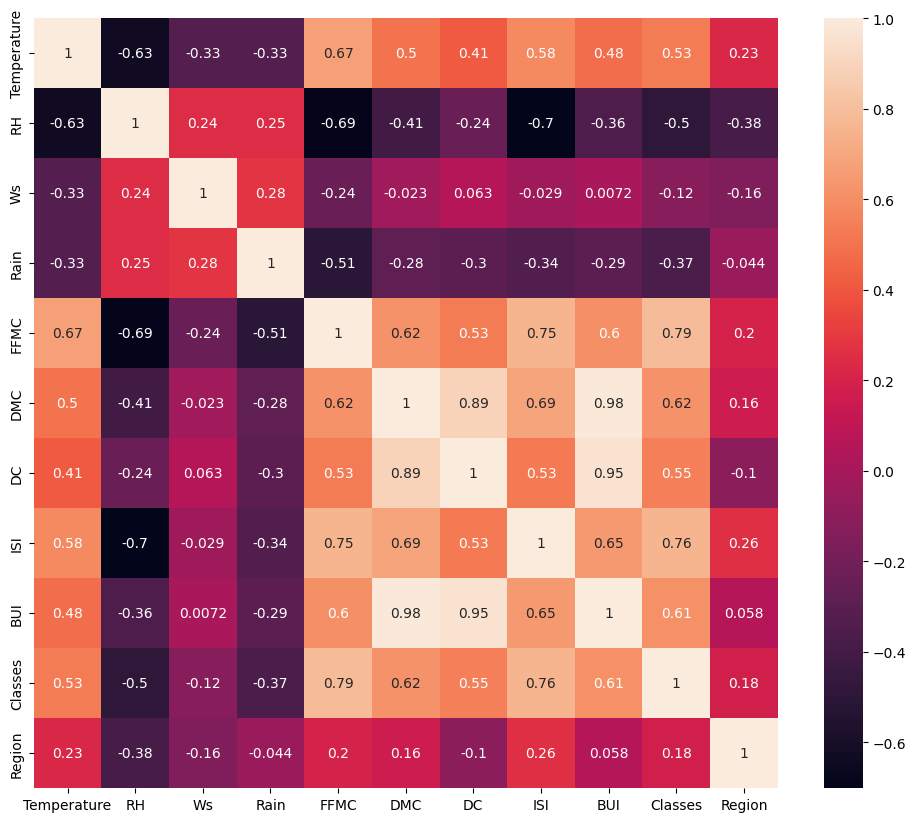

In [45]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [46]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
##threshold -- Domain Expert
corr_features = correlation(X_train,0.85)

In [48]:
#drop these features when correlation more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [49]:
X_train.shape,X_test.shape

((181, 9), (61, 9))

In [50]:
##Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


<Axes: >

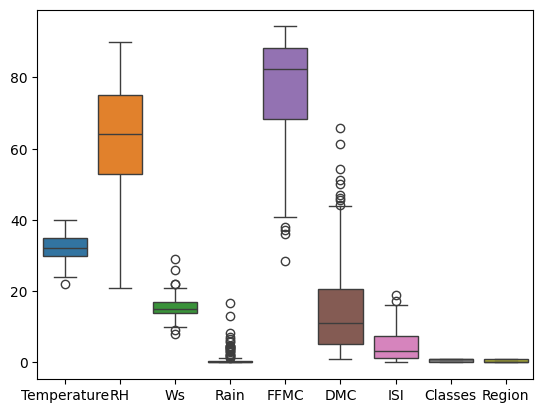

In [51]:
## Box plots to understand Effects of Scalar
sns.boxplot(X_train)


<Axes: >

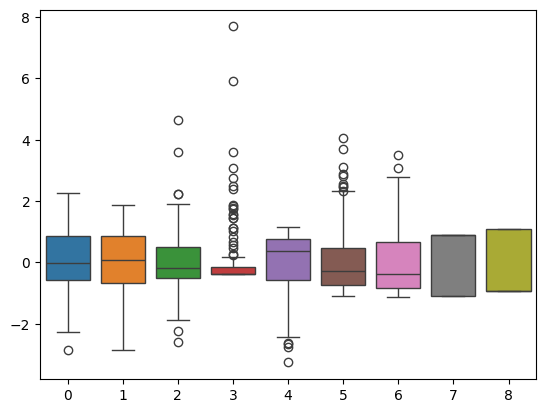

In [52]:
sns.boxplot(X_train_scaled)

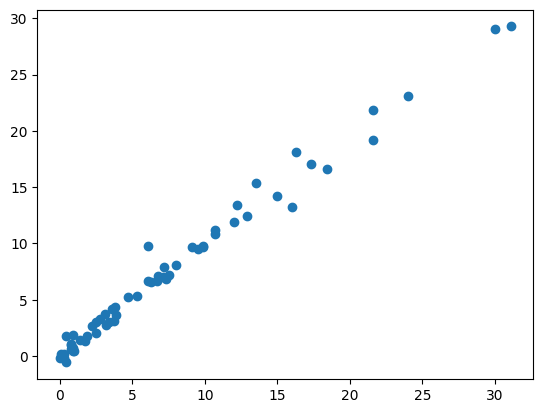

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)

Mean Absolute Error 1.2887226168562769
R2 Score 0.9445798376194435


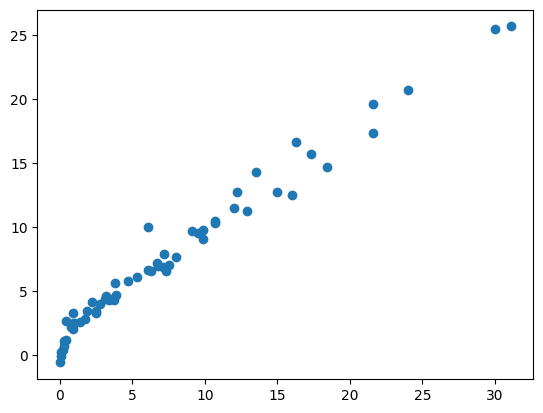

In [54]:
##Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = Lasso()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)


Mean Absolute Error 0.6412056929056867
R2 Score 0.983186187435969


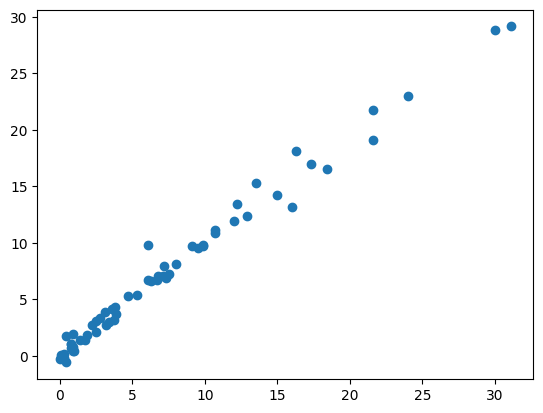

In [55]:
##Ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = Ridge()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error 1.914281057226335
R2 Score 0.8715431586688767


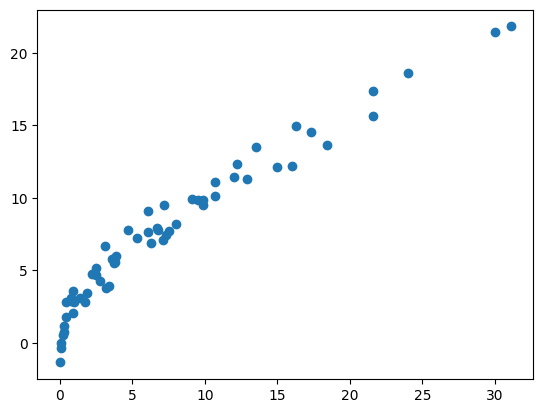

In [56]:
#Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = ElasticNet()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [57]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred_lasso = lassocv.predict(X_test_scaled)

In [58]:
import pickle

pickle.dump(lassocv,open('lasso.pkl','wb'))

In [59]:
lassocv.mse_path_

array([[66.28153346, 51.92467509, 62.12574845, 42.17600161, 50.12909211],
       [64.8049882 , 46.29145842, 57.51594369, 38.03926996, 44.45742325],
       [57.52786787, 40.97016485, 51.64861789, 34.05559686, 38.81069162],
       [50.23915116, 35.76647299, 46.09838034, 29.92201048, 33.9009598 ],
       [43.9387138 , 31.24312424, 40.4293405 , 26.31573515, 29.63202239],
       [38.49512644, 27.31124881, 35.48647158, 23.16852883, 25.92020481],
       [33.79444563, 23.89345567, 31.17664741, 20.42176627, 22.69310889],
       [29.73757581, 20.92303278, 27.41788947, 18.02371058, 19.88739726],
       [26.23845112, 18.3413782 , 24.13911443, 15.92955296, 17.44796158],
       [23.22260403, 16.0977285 , 21.27809933, 14.10027996, 15.32733573],
       [20.62515952, 14.14794083, 18.78173444, 12.50167668, 13.48377645],
       [18.38989583, 12.45342465, 16.60273789, 11.10468342, 11.88113796],
       [16.46791311, 10.98124001, 14.70029663,  9.88325718, 10.48798649],
       [14.81713492,  9.70212659, 13.0

In [60]:
lassocv.alpha_

0.03887879362493651

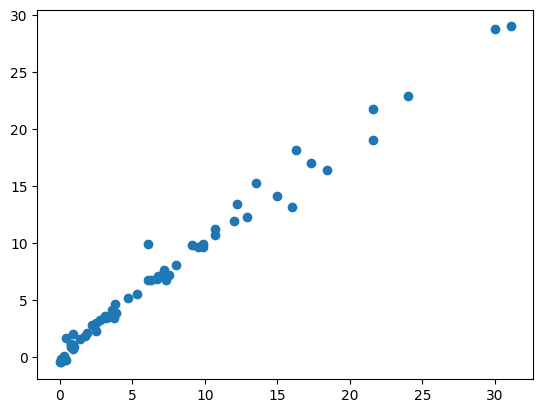

In [61]:
plt.scatter(y_test,y_pred_lasso)

In [62]:
## Ridge CV
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred_ridge = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_ridge)
score = r2_score(y_test,y_pred_ridge)
print(mae,score)

0.6412056929056867 0.983186187435969


In [63]:
pickle.dump(ridgecv,open('ridge.pkl','wb'))

In [64]:
from sklearn.linear_model import ElasticNetCV
elasticv = ElasticNetCV(cv=5)
elasticv.fit(X_train_scaled,y_train)
y_pred_elastic = elasticv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_elastic)
score = r2_score(y_test,y_pred_elastic)
print(mae,score)

0.6797581746740939 0.9813189087634552


In [65]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
